In [2]:
#Read Dataset
import pandas as pd 
df=pd.read_csv('supermarket_sales.csv')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['DayOfWeek'] = df['Date'].dt.day_name()

C:\Users\risha\AppData\Local\Temp\ipykernel_1316\2159849492.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-11-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-11-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-11-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-11-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-11-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [44]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2024-11-06 15:24:41.880000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-11-06 10:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-11-06 12:43:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-11-06 15:19:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-11-06 18:15:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2024-11-06 20:59:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858


In [18]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
DayOfWeek                     7
dtype: int64

1. Analyzing the Number of Sales by Branches

In [ ]:
df.groupby("Branch")["Branch"].count()

Branch
A    340
B    332
C    328
Name: Branch, dtype: int64

In [20]:
Branch_counts = df['Branch'].value_counts()

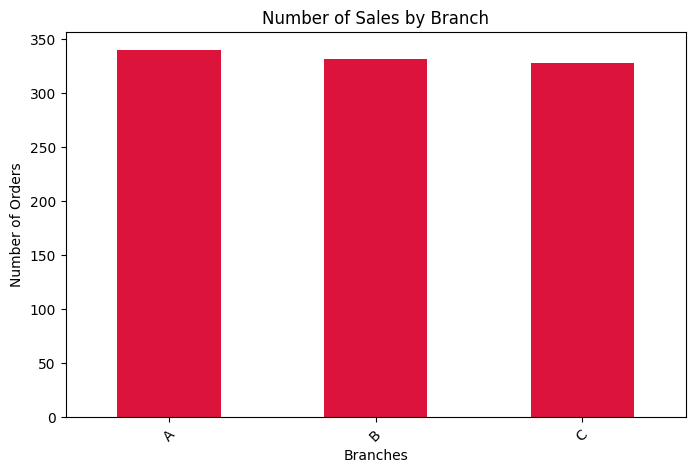

In [133]:
#Plotting the Branch counts 
plt.figure(figsize=(8, 5))
Branch_counts.plot(kind='bar',color='crimson')
plt.title('Number of Sales by Branch') 
plt.xlabel('Branches') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45) 
plt.show()

COCLUSION: Branch "A" has the Highest Number of Sales

2. Identify the Most Expensive Product in the Super Market

In [ ]:
df[df['Unit price']==99.96]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
122,219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,2019-03-09,2024-11-06 17:26:00,Credit card,899.64,4.761905,44.982,4.2,Saturday
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.986,734.706,2019-01-23,2024-11-06 10:33:00,Cash,699.72,4.761905,34.986,6.1,Wednesday


3. Identify Product with Most Gross Income and the Highest Bill Amount

In [ ]:
df[df['gross income']==49.650000]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2019-02-15,2024-11-06 14:53:00,Credit card,993.0,4.761905,49.65,6.6,Friday


4. Identify Products with Highest Rating

In [ ]:
df[df['Rating']==10]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,2024-11-06 17:47:00,Credit card,74.22,4.761905,3.7110,10.0,Friday
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,2024-11-06 13:40:00,Ewallet,495.63,4.761905,24.7815,10.0,Sunday
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,2024-11-06 19:18:00,Ewallet,560.34,4.761905,28.0170,10.0,Wednesday
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,2024-11-06 16:49:00,Credit card,323.20,4.761905,16.1600,10.0,Wednesday
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,2024-11-06 11:58:00,Ewallet,527.90,4.761905,26.3950,10.0,Monday


5. Identify which Branch constitutes to Highest Gross Income

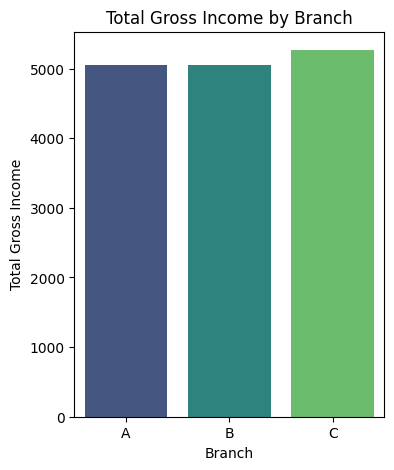

In [ ]:
branch_gross_income=df.groupby('Branch')['gross income'].sum().reset_index()

plt.figure(figsize=(4, 5))
sns.barplot(x='Branch', y='gross income',hue='Branch',data=branch_gross_income, palette='viridis')
plt.title('Total Gross Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.show()

COCLUSION: Branch "C" has the Highest Total Gross Income

6. Identify which Branch has the Highest Revenue

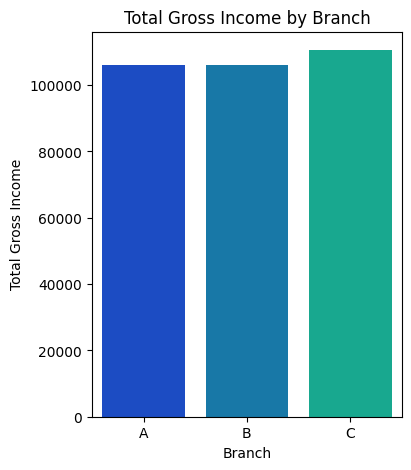

In [139]:
branch_revenue=df.groupby('Branch')['Total'].sum().reset_index()

plt.figure(figsize=(4, 5))
sns.barplot(x='Branch', y='Total', hue='Branch',data=branch_revenue, palette='winter')
plt.title('Total Gross Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.show()

COCLUSION: Branch "C" has the Highest Revenue as well. 

7. Analyse the Number of Sales by Cities

In [ ]:
df.groupby('City') ['City'].count()

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: City, dtype: int64

In [26]:
# Count the occurrences of each City 
city_counts = df['City'].value_counts()

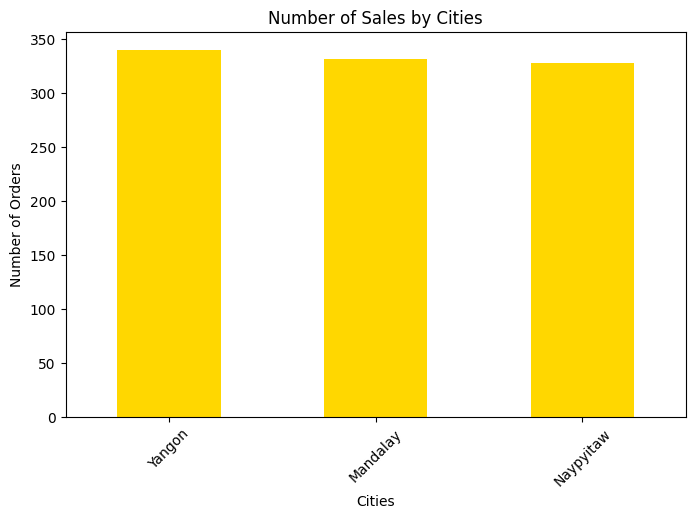

In [134]:
# Plotting the city
plt.figure(figsize=(8, 5)) 
city_counts.plot(kind='bar', color='gold') 
plt.title('Number of Sales by Cities') 
plt.xlabel('Cities') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45) 
plt.show()

CONCLUSION: "YANGON" City has the Highest Number of Sales than other two cities.

8. Identify which City constitutes to Highest Gross Income.

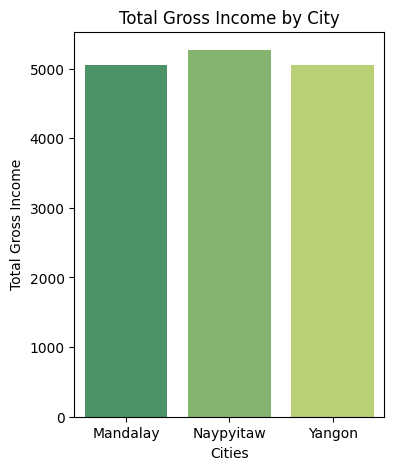

In [140]:
city_gross_income=df.groupby('City')['gross income'].sum().reset_index()

plt.figure(figsize=(4, 5))
sns.barplot(x='City', y='gross income', hue='City',data=city_gross_income, palette='summer')
plt.title('Total Gross Income by City')
plt.xlabel('Cities')
plt.ylabel('Total Gross Income')
plt.show()

COCLUSION: "NAYPYIDAW" City has recorded the Highest Gross Income, closely followed by the next two Cities which have nearly identical figures.

9. Analyzing the Number of Sales by Customer Type.

In [ ]:
df.groupby('Customer type') ['Customer type'].count()

Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64

In [31]:
# Count the occurrences of each Custommer type
CustomerType_counts = df['Customer type'].value_counts()

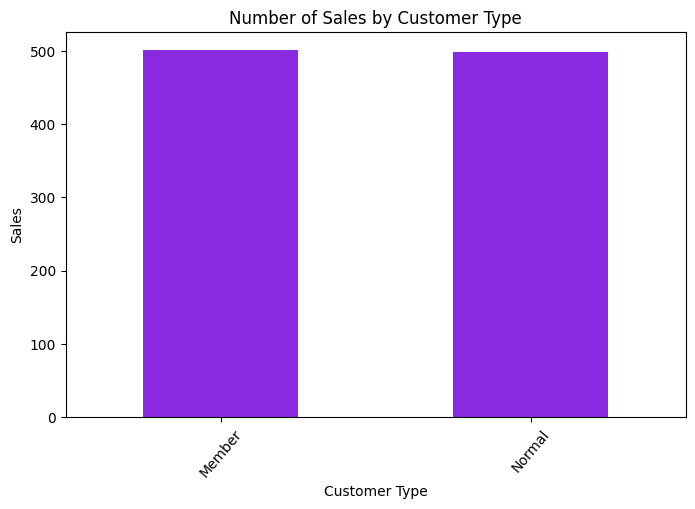

In [104]:
# Plotting the Customer Type
plt.figure(figsize=(8, 5)) 
CustomerType_counts.plot(kind='bar', color='blueviolet') 
plt.title('Number of Sales by Customer Type') 
plt.xlabel('Customer Type') 
plt.ylabel('Sales') 
plt.xticks(rotation=50)  
plt.show()

CONCLUSION: "Members" have a significantly Higher Total Sales compared to non-members. This suggests that membership programs may be effective in encouraging increased spending among customer.

10. Identify which Customer type constitutes to Highest Revenue

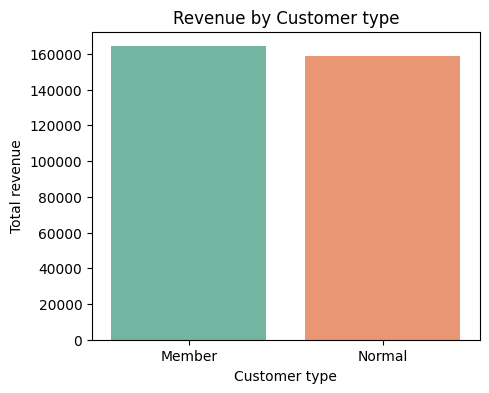

In [143]:
customer_type_revenue=df.groupby('Customer type')['Total'].sum().reset_index()

plt.figure(figsize=(5, 4))
barplot=sns.barplot(x='Customer type', y='Total',hue='Customer type', data=customer_type_revenue, palette='Set2')
plt.title('Revenue by Customer type')
plt.xlabel('Customer type')
plt.ylabel('Total revenue')
plt.show()

CONCLUSION: It seems that "Members" contributed more towards the revenue. when the customer becomes Member they shop more, so the store could focus more to increase the number of members.

11. Analyse the Number of Sales by Gender

In [ ]:
df.groupby('Gender')['Gender'].count()

Gender
Female    501
Male      499
Name: Gender, dtype: int64

In [38]:
# Count the occurrences of each Gender
gender_counts = df['Gender'].value_counts()

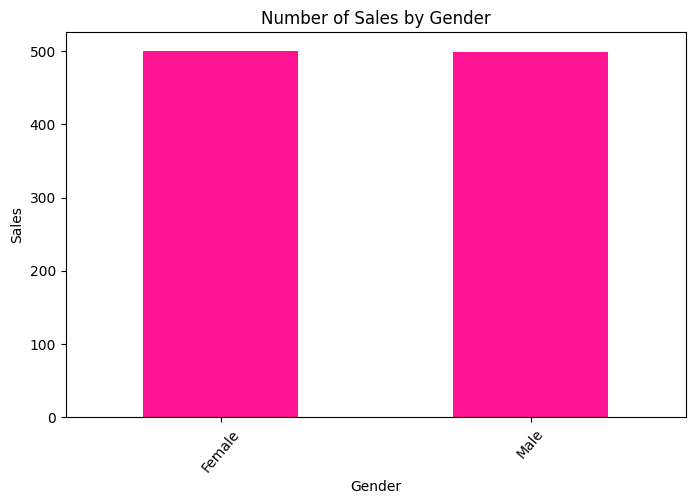

In [103]:
# Plotting the Gender
plt.figure(figsize=(8, 5)) 
gender_counts.plot(kind='bar', color='deeppink') 
plt.title('Number of Sales by Gender') 
plt.xlabel('Gender') 
plt.ylabel('Sales') 
plt.xticks(rotation=50) 
plt.show()

CONCLUSION: Most Number of Sales done by "FEMALE" than Male.

12. Analyse the Number of Product line Purchased by Each Gender.

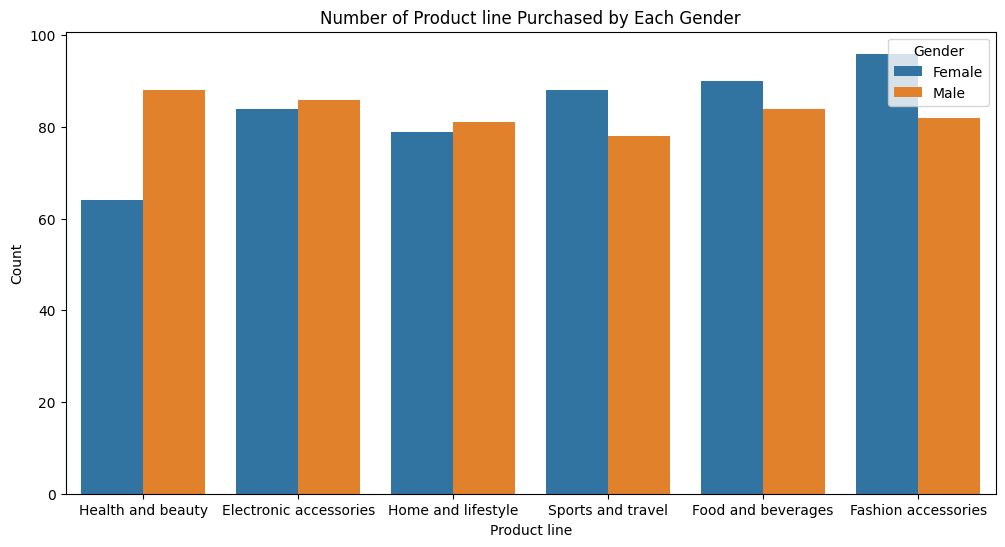

In [136]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Number of Product line Purchased by Each Gender')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

CONCLUSION: "Healthy and Beauty" is the Product Mostly Purchased by Males and "Fashion Accessories" is the Mostly by Females.

13. Identify which Gender constitutes to Highest Revenue.

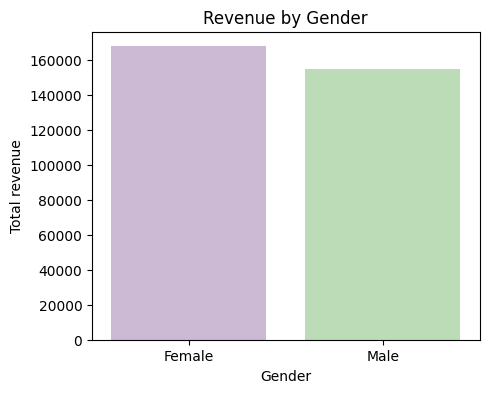

In [144]:
gender_revenue=df.groupby('Gender')['Total'].sum().reset_index()

plt.figure(figsize=(5, 4))
barplot=sns.barplot(x='Gender', y='Total',hue='Gender', data=gender_revenue, palette='PRGn')
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total revenue')
plt.show()

CONCLUSION: It seems that "FEMALES" contributed more towards the revenue. So the store could have more offers for them and also focus to have more products for Males as well to have more revenue.

14. Identify the Most Prefered Product Line.

In [ ]:
df.groupby('Product line')['Product line'].count()


Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Product line, dtype: int64

In [47]:
# Count the occurrences of each Product Line 
productline_counts = df['Product line'].value_counts()

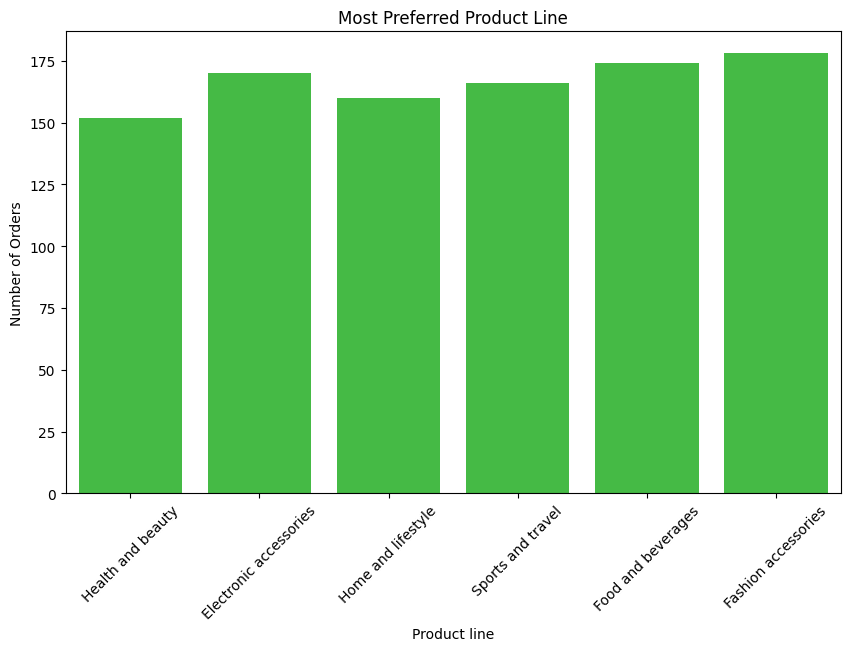

In [ ]:
# Identify Which is the Most preferred Product Line

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product line',color='limegreen')
plt.title('Most Preferred Product Line')
plt.xlabel('Product line') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.show()


CONCLUSION: Most Preferred Product from the Product line is "Fashion Accessories" than any other Product.

15. Analysing the Distribution of Products in Super Market.

Text(0.5, 1.0, 'Distribution of Products Line in Super Market')

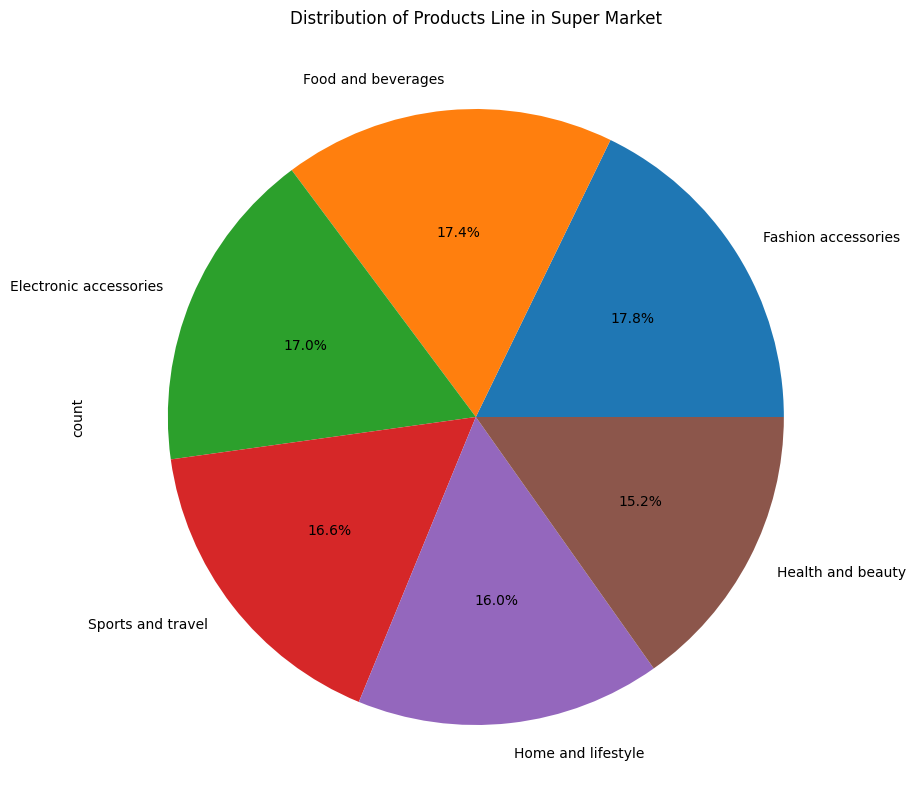

In [ ]:
plt.figure(figsize=(12,10))
df['Product line'].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.title('Distribution of Products Line in Super Market')

CONCLUSION: The "Food and Bevarages" Product line have the Highest Total Sales with 17.4% and "Health and Beauty" have the Lowest Sales with 15.2%.

16. Identify which Product line constitutes to Highest Average Rating.

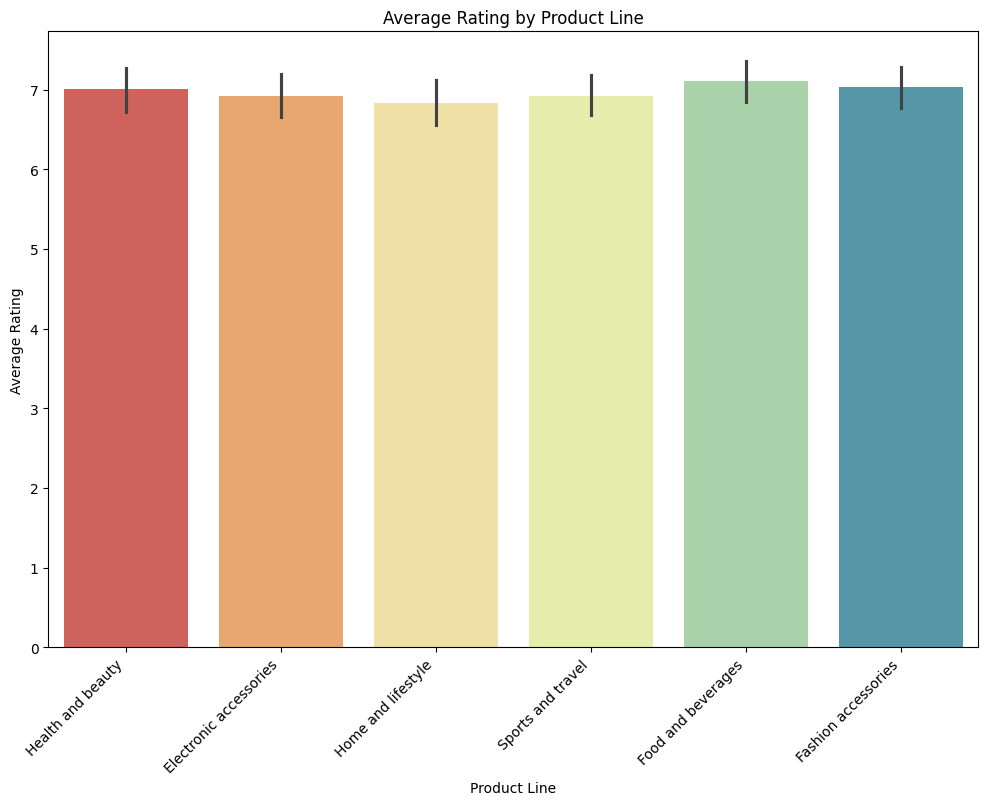

In [146]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Product line', y='Rating',hue='Product line',data=df, palette='Spectral')
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.show()

CONCLUSION: "Food and Beverages" have got the Highest Average Ratings compare to other product lines. So, the store can leverage the feedback by customer and improve other product lines as well.

17. Identify which is the Most Prefered Payment Method by Customers.

In [ ]:
df.groupby('Payment') ['Payment'].count()

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64

In [110]:
# Count the occurrences of payment method 
Payment_counts = df['Payment'].value_counts()

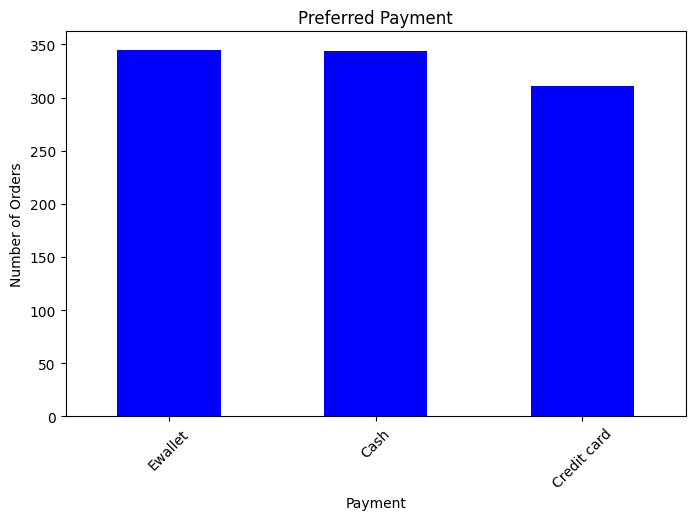

In [111]:
# Plotting the Payment Method
plt.figure(figsize=(8, 5)) 
Payment_counts.plot(kind='bar', color='Blue') 
plt.title('Preferred Payment') 
plt.xlabel('Payment') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45) 
plt.show()

CONCLUSION: It seems people Prefers "Ewallet" and "Cash" as favourite modes of Payment. So, maybe there's an opportunity for the Super Market to collaborate with more Credit Card companies to offer discounts which could lead to more sales.

18. Identify which is the Day Most Sales done by Customers.

In [ ]:
df.groupby('DayOfWeek') ['DayOfWeek'].count()

DayOfWeek
Friday       139
Monday       125
Saturday     164
Sunday       133
Thursday     138
Tuesday      158
Wednesday    143
Name: DayOfWeek, dtype: int64

In [127]:
daywise_sales = df.groupby('DayOfWeek')['Total'].sum()

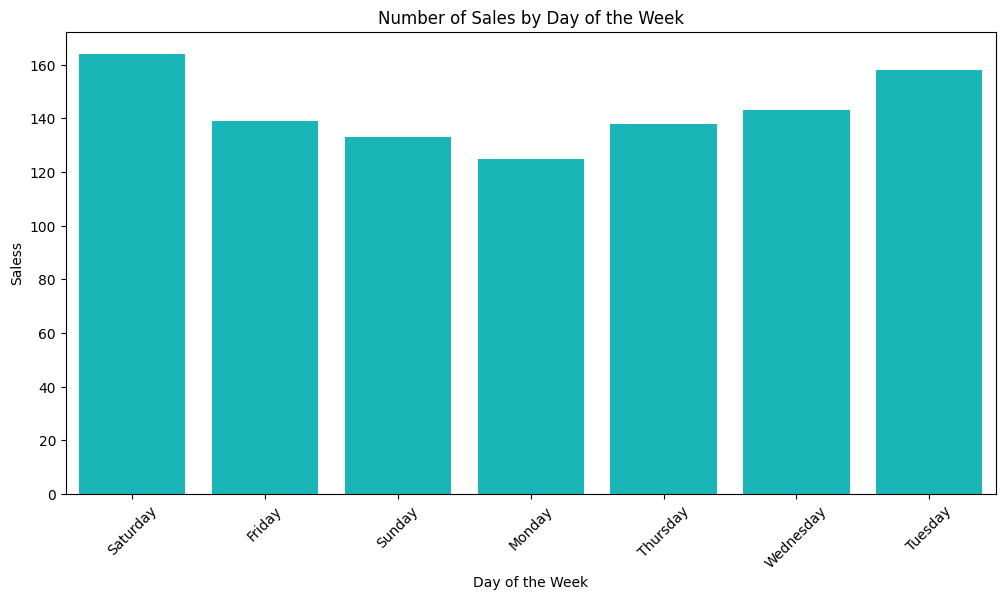

In [130]:
# Analyzing sales by day of the week

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DayOfWeek',color='darkturquoise')
plt.title('Number of Sales by Day of the Week')
plt.xlabel('Day of the Week') 
plt.ylabel('Saless') 
plt.xticks(rotation=45)
plt.show()

CONCLUSION: So, "Saturday" contributed to the Most Sales follwed by Tuesday. So, Make more offers for other days to attract people on other days as well.